# 1 Matrices and Numpy

## 1.1 Matrices Theory

### 1.1.1 Write properties of matrices

### 1.1.2 Write a python function to get a matrix from user

In [1]:
import numpy as np

In [2]:
def Get_Matrix():
    r=int(input("Enter number of Rows"))
    c=int(input("Enter number of Columns"))
    A=np.zeros((r,c),dtype=np.int64)
    for i in range(r):
        for j in range(c):
            A[i][j]=int(input("Enter element row={} and column={} -->".format(r,c)))
    return A

## 1.1.3 Get two matrices from the user and give them names A and B

In [3]:
A=Get_Matrix()
B=Get_Matrix()

Enter number of Rows2
Enter number of Columns2
Enter element row=2 and column=2 -->1
Enter element row=2 and column=2 -->2
Enter element row=2 and column=2 -->3
Enter element row=2 and column=2 -->4
Enter number of Rows2
Enter number of Columns2
Enter element row=2 and column=2 -->5
Enter element row=2 and column=2 -->6
Enter element row=2 and column=2 -->7
Enter element row=2 and column=2 -->8


In [4]:
A

array([[1, 2],
       [3, 4]], dtype=int64)

In [5]:
B

array([[5, 6],
       [7, 8]], dtype=int64)

## 1.2 Matrix manipulation without using Numpy

In [6]:
def Check_Matrix(A,B):
    if(len(A[0])!=len(B)):
        raise Exception("Matrices can not multiplay as A[columns]!=B[rows]")
    else:
       print('Performing Multiplication')

In [7]:
def Matrix_Multi(A,B):
    Check_Matrix(A,B)
    sum=0
    C=np.zeros((len(A),len(B[0])),dtype=np.int32)
    #print('x\ty\tz\tA[x][z]\tB[z][y]\tsum')
    for x in range(len(A)):
        for y in range(len(B[0])):
            for z in range(len(A[0])):
                sum+=A[x][z]*B[z][y]
                #print(x,"\t",y,"\t",z,"\t",A[x][z],"\t",B[z][y],"\t",sum)
            C[x][y]=sum
            sum=0
    return C

In [8]:
def Print_Matrix(A):
    for i in range(len(A)):
        for j in range(len(A[0])):
            print(A[i][j],end="\t")
        print("")

In [9]:
Print_Matrix(Matrix_Multi(A,B))

Performing Multiplication
19	22	
43	50	


### 1.2.1 Perform A^n (n is a user entered values)

In [10]:
n=int(input("Enter value of n for A^n:"))
An=A
for i in range(n-1):
    An=Matrix_Multi(An,An)

Print_Matrix(An)

Enter value of n for A^n:2
Performing Multiplication
7	10	
15	22	


### 1.2.2 Perform A Transpose

In [11]:
def Matrix_Transpose(A):
    T=np.zeros((len(A[0]),len(A)))
    for i in range(len(A)):
        for j in range(len(A[0])):
            T[i][j]=A[j][i]
    return(T)

In [12]:
Print_Matrix(Matrix_Transpose(A))

1.0	3.0	
2.0	4.0	


### 1.2.3 Calculate Determinant of A

## D=Get_Matrix()

In [13]:
def Minor(Sub_Matrix,i,j):
    c = Sub_Matrix[:]
    c = np.delete(c,(i),axis=0)
    return [np.delete(r,(j),axis=0) for r in (c)]

In [14]:
def Deter_Matrix(D):
    n = len(D)
    if n == 1 :return D[0][0]
    if n == 2 :return D[0][0]*D[1][1] - D[0][1]*D[1][0]
    sum = 0
    for j in range(0,n):
        m = Minor(D,0,j)
        sum =sum + ((-1)**j)*D[0][j] * Deter_Matrix(m)
    return sum

In [15]:
Print_Matrix(A)
print(Deter_Matrix(A))

1	2	
3	4	
-2


### 1.2.4 Calculate A Inverse (If not possible code should give relevant reason)

In [16]:
def Inverse_Matrix(D):
    if (Deter_Matrix(D)==0):
        raise Exception("Inverse can not be calculates as |D|=0")
    else:
        Inv_Matrix=np.zeros((len(D),len(D)),dtype=np.int32)
        for i in range(0,len(D)):
            for j in range(0,len(D)):
                Sub=Minor(D,i,j)
                #print(Sub)
                Inv_Matrix[i][j]=((-1)**(i+j+1)) * Deter_Matrix(Sub)
    #Print_Matrix(Inv_Matrix)
    Det_D=Deter_Matrix(D)
    #print(Det_D)
    Inv_Matrix=Matrix_Transpose(Inv_Matrix)/Det_D
    #Print_Matrix(Inv_Matrix)
    return Inv_Matrix

In [17]:
print(Inverse_Matrix(A))

[[ 2.  -1. ]
 [-1.5  0.5]]


### 1.2.5 Calculate A*B (If not possible, code should give relevant reason)

In [18]:
Print_Matrix(Matrix_Multi(A,B))

Performing Multiplication
19	22	
43	50	


### 1.2.6 Calculate A+B (If not possible, code should give relevant reason)

In [19]:
def Matrix_Add(A,B):
    if len(A)!=len(B) or len(A[0])!=len(B[0]):
        raise Exception("Matrix Dimention must be same for Addition")
    else:
        C=np.zeros((len(A),len(A[0])),dtype=np.int32)
        for i in range(len(A)):
            for j in range(len(B)):
                C[i][j]=A[i][j]+B[i][j]
        return C

In [20]:
Print_Matrix(Matrix_Add(A,B))

6	8	
10	12	


## 1.3 Matrix manipulation using Numpy


### 1.3.1 Perform all the operations in the previous question using Numpy

In [21]:
A*B

array([[ 5, 12],
       [21, 32]], dtype=int64)

### 1.3.2 Perform following operations in Numpy: Reduced Mean, Reduced Sum, Argmax, Zip and One Hot Encoding

In [22]:
A.mean()

2.5

In [23]:
A.mean(0)

array([2., 3.])

In [24]:
A.mean(1)

array([1.5, 3.5])

In [25]:
A.sum()

10

In [26]:
A.sum(0)

array([4, 6], dtype=int64)

In [27]:
A.sum(1)

array([3, 7], dtype=int64)

In [28]:
A.argmax()

3

In [29]:
A.argmax(0)

array([1, 1], dtype=int64)

In [30]:
A.argmax(1)

array([1, 1], dtype=int64)

In [31]:
print(list(zip(A,B)))

[(array([1, 2], dtype=int64), array([5, 6], dtype=int64)), (array([3, 4], dtype=int64), array([7, 8], dtype=int64))]


In [32]:
print('Given Matrix\n',A)
Arr=A.reshape(1,-1)
print('Equivalent Array\n',Arr)
shape = (A.size, A.max()+1)
one_hot = np.zeros(shape)
rows = np.arange(Arr.size)
one_hot[rows,Arr] = 1
print('One Hot Encoding\n',one_hot)

Given Matrix
 [[1 2]
 [3 4]]
Equivalent Array
 [[1 2 3 4]]
One Hot Encoding
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# 2 Pandas

## 2.1 read a csv data to pandas dataframe (data 1)

## 2.2 Demonstrate any 5 functions from the following link on the loaded dataset

https://pandas.pydata.org/docs/reference/general_functions.html

In [33]:
import pandas as pd
Data_1=pd.read_csv("data_1.csv",names=["Value 1", "Value 2"])
Data_1.head()

,Value 1,Value 2
0,-0.752400,-1.992827
1,-0.702025,-1.935445
2,0.058185,-1.020321
3,-0.097662,-1.857889
4,-0.369050,0.209050


In [34]:
pd.isna(pd.NA)

True

In [35]:
pd.isna(np.nan)

True

In [36]:
pd.notna(pd.NA)

False

In [37]:
pd.notna(np.nan)

False

In [38]:
pd.melt(Data_1, id_vars=['Value 1'], value_vars=['Value 2'])

,Value 1,variable,value
0,-0.752400,Value 2,-1.992827
1,-0.702025,Value 2,-1.935445
2,0.058185,Value 2,-1.020321
3,-0.097662,Value 2,-1.857889
4,-0.369050,Value 2,0.209050
...,...,...,...
9995,0.106437,Value 2,-1.723467
9996,-0.535412,Value 2,-2.009323
9997,1.358514,Value 2,4.867444
9998,0.668055,Value 2,2.753525


In [39]:
Data_1.pivot(index='Value 1', columns='Value 2', values='Value 2')


Value 2,-13.892867,-11.327178,-10.474207,-10.180503,-10.164034,-10.144762,-9.999708,-9.798856,-9.624723,-9.544635,...,9.572446,9.620763,9.685988,9.726477,9.799602,10.180504,10.973201,11.655695,12.152760,12.279487
Value 1,,,,,,,,,,,,,,,,,,,,,
-3.949464,-13.892867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.641073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.266283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.162066,NaN,NaN,NaN,NaN,NaN,NaN,-9.999708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.155156,NaN,NaN,NaN,NaN,-10.164034,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.181505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.726477,NaN,NaN,NaN,NaN,NaN,NaN
3.231842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.265952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.15276,NaN


In [40]:
pd.cut(Data_1['Value 1'], 3)

0       (-1.439, 1.072]
1       (-1.439, 1.072]
2       (-1.439, 1.072]
3       (-1.439, 1.072]
4       (-1.439, 1.072]
             ...       
9995    (-1.439, 1.072]
9996    (-1.439, 1.072]
9997     (1.072, 3.583]
9998    (-1.439, 1.072]
9999    (-1.439, 1.072]
Name: Value 1, Length: 10000, dtype: category
Categories (3, interval[float64, right]): [(-3.957, -1.439] < (-1.439, 1.072] < (1.072, 3.583]]

# 3 Plotting

## 3.1 read a csv data to pandas dataframe (data 2)

In [41]:
Data_2=pd.read_csv('data_2.csv',names=['Value 1','Value 2'])
Data_2.head()

,Value 1,Value 2
0,-6.283185,0.043487
1,-6.281929,0.084347
2,-6.280672,-0.028693
3,-6.279415,0.021445
4,-6.278158,0.020871


In [51]:
Data_2.describe()

,Value 1,Value 2
count,1.000000e+04,10000.000000
mean,4.313883e-16,0.000141
std,3.628143e+00,0.709152
min,-6.283185e+00,-1.151122
25%,-3.141593e+00,-0.704131
50%,4.440892e-16,-0.002135
75%,3.141593e+00,0.701588
max,6.283185e+00,1.145402


## 3.2 plot the above dataset using matplotlib

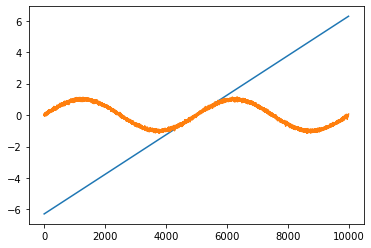

In [43]:
import matplotlib.pyplot as plt
plt.plot(Data_2)

## 3.3 load the tips dataset from seaborn

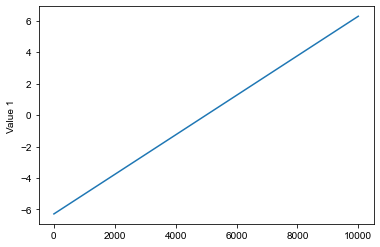

In [44]:
import seaborn as sb
sb.lineplot(data=Data_2['Value 1'])
sb.set_style("dark")
plt.show()

## 3.4 plot pairplot, jointplot, catplot, displot, and HeatMap for the above dataset and give your comments on each plot

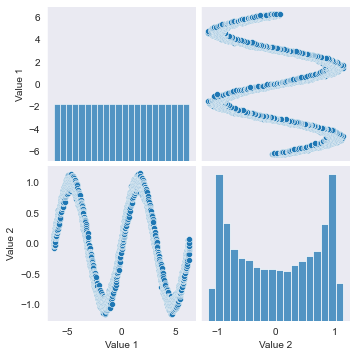

In [45]:
sb.pairplot(Data_2)

A pairplot plot a pairwise relationships in a dataset
As we can see in describe the both data have min -6.283185e+00 and -1.151122 where as max 6.283185e+00 and 1.145402 respectively.
So all 4 plots are 1to1, 1to2, 2to1 and 2to2 values distribution plots.

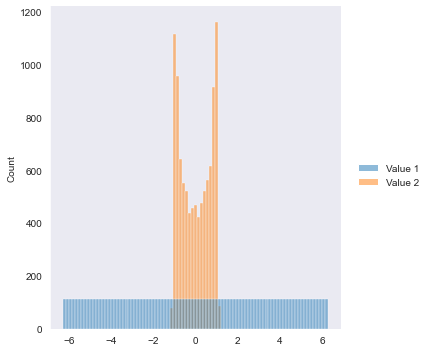

In [46]:
sb.displot(data=Data_2)

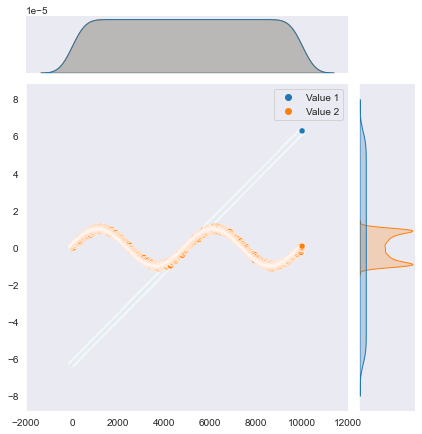

In [47]:
sb.jointplot(data=Data_2)

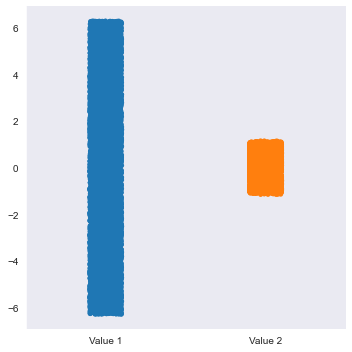

In [48]:
sb.catplot(data=Data_2)

<AxesSubplot:>

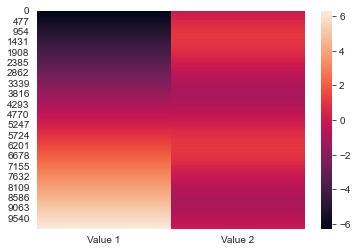

In [49]:
sb.heatmap(Data_2)